<a href="https://colab.research.google.com/github/Fyzie/DLIVA_CV_Workshop_Assignments/blob/main/class%20training/Build_a_custom_CNN_with_pytorch_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Build a Convolutional Network

Develop a Convolutional Neural Network (CNN) with Pytorch.

It is time to apply what we learned about CNNs through an assignment. We will build a fully functional CNN and train it with our familiar CIFAR10 dataset.

The CNN structure will be:

- A conv layer with 3 channels as input, 6 channels as output, and a 5x5 kernel
- A 2x2 max-pooling layer
- A conv layer with 6 channels as input, 16 channels as output, and a 5x5 kernel
- A linear layer with 16x5x5 nodes
- A linear layer with 120 nodes
- A linear layer with 84 nodes
- A linear layer with 10 nodes

Don’t forget to add a Relu layer after each convolutional and linear layer, except the last one because that should output the actual classification.

Finally, let’s use Vanilla SGD once again with a learning rate of 0.001 and a momentum of 0.9, and the cross-entropy loss for our loss function. As you can see in the code, we will train the model in the entire dataset for 1 epoch.

You will need to write code in 5 different places:

1. Define the layers in the CNN __init__.
2. Stack the layers in forward.
3. Define the loss and optimizer in train.
4. Get the Cifar10 image and label, inside the for-loop in train.
5. Run the forward and backward pass.

### Build and train a CNN

The below code should seem familiar to you as it's very similar with the one we used when training a feedforward network. The difference is that this time we have a CNN.

Once again, we will import all the necessary libraries along with our pet images dataset. The images will be transformed to tensors and will be normalized.

In [ ]:
import os

#Numpy is linear algebra lbrary
import numpy as np
# Matplotlib is a visualizations library 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary

In [ ]:
transform = transforms.Compose(
    [transforms.Resize((100,100)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
       'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

Files already downloaded and verified
Files already downloaded and verified
50000
10000


In [ ]:
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


## Define a CNN
Here you will come into play. Try to define the necessary layers and build the forward pass of our model. Remember that the model's structure is:

- A conv layer with 3 channels as input, 6 channels as output, and a 5x5 kernel
- A 2x2 max-pooling layer
- A conv layer with 6 channels as input, 16 channels as output, and a 5x5 kernel
- A linear layer with 1655 nodes
- A linear layer with 120 nodes
- A linear layer with 84 nodes
- A linear layer with 10 nodes

The trickiest part when building CNNs is to find the correct dimensions for each layer. If you managed to use the correct arguments in the Conv2d layers, you will be ok. Also play close attention to first Linear layer. How will you be able to pass the feature map?

## Solution

In [ ]:
#1. DEFINE THE CNN 
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.batchnorm = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.conv4 = nn.Conv2d(32, 64, 3)
        self.conv5 = nn.Conv2d(64, 128, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(128 * 1 * 1, 84)
        self.fc2 = nn.Linear(84, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.batchnorm(self.pool(self.relu(self.conv1(x))))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = self.pool(self.relu(self.conv5(x)))
        # print(x.shape)
        x = x.view(-1, 128 * 1 * 1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [ ]:
model = CNN() # need to instantiate the network to be used in instance method

# 2. LOSS AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
summary(model,(3, 100, 100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 98, 98]             168
              ReLU-2            [-1, 6, 98, 98]               0
         MaxPool2d-3            [-1, 6, 49, 49]               0
       BatchNorm2d-4            [-1, 6, 49, 49]              12
            Conv2d-5           [-1, 16, 47, 47]             880
              ReLU-6           [-1, 16, 47, 47]               0
         MaxPool2d-7           [-1, 16, 23, 23]               0
            Conv2d-8           [-1, 32, 21, 21]           4,640
              ReLU-9           [-1, 32, 21, 21]               0
        MaxPool2d-10           [-1, 32, 10, 10]               0
           Conv2d-11             [-1, 64, 8, 8]          18,496
             ReLU-12             [-1, 64, 8, 8]               0
        MaxPool2d-13             [-1, 64, 4, 4]               0
           Conv2d-14            [-1, 12

In [ ]:
import time # to calculate training time

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_test_loss = valid_loss/test_data_size 
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, 'cifar10_model_'+str(epoch)+'.pt')
            
    return model, history

In [ ]:
# 4. Train the model for 10 epochs

num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 1.7767, Accuracy: 34.3240%, 
		Validation : Loss : 1.4477, Accuracy: 47.4800%, Time: 103.3964s
Epoch: 2/10
Epoch : 001, Training: Loss: 1.3018, Accuracy: 53.6860%, 
		Validation : Loss : 1.0987, Accuracy: 61.7700%, Time: 100.6245s
Epoch: 3/10
Epoch : 002, Training: Loss: 1.0786, Accuracy: 62.3940%, 
		Validation : Loss : 1.0068, Accuracy: 65.3600%, Time: 98.9519s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.9456, Accuracy: 67.3800%, 
		Validation : Loss : 0.9319, Accuracy: 67.8300%, Time: 99.4688s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.8501, Accuracy: 70.6880%, 
		Validation : Loss : 0.9077, Accuracy: 69.1000%, Time: 96.9189s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.7908, Accuracy: 72.8080%, 
		Validation : Loss : 0.8445, Accuracy: 70.8000%, Time: 98.4915s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.7402, Accuracy: 74.5000%, 
		Validation : Loss : 0.9678, Accuracy: 68.4600%, Time: 96.2739s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.6974, Accu

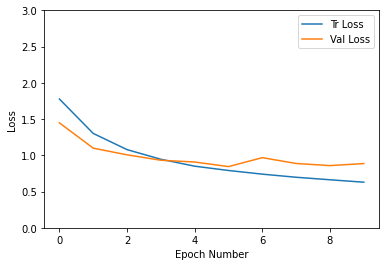

In [ ]:
# 5. Analyze the loss curve

history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,3)
# plt.savefig('cifar10_loss_curve.png')
plt.show()

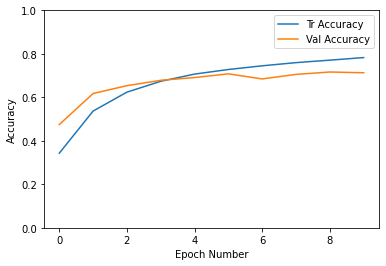

In [ ]:
# 6. Analyze the accuracy curve

plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
# plt.savefig('cifar10_accuracy_curve.png')
plt.show()

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
#         images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
#         images = images.view(images.size(0), -1)
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 71 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
#         images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 79.2 %
Accuracy for class: car   is 78.1 %
Accuracy for class: bird  is 61.4 %
Accuracy for class: cat   is 54.6 %
Accuracy for class: deer  is 71.7 %
Accuracy for class: dog   is 68.0 %
Accuracy for class: frog  is 78.5 %
Accuracy for class: horse is 68.9 %
Accuracy for class: ship  is 76.2 %
Accuracy for class: truck is 76.4 %


### Confusion Matrix

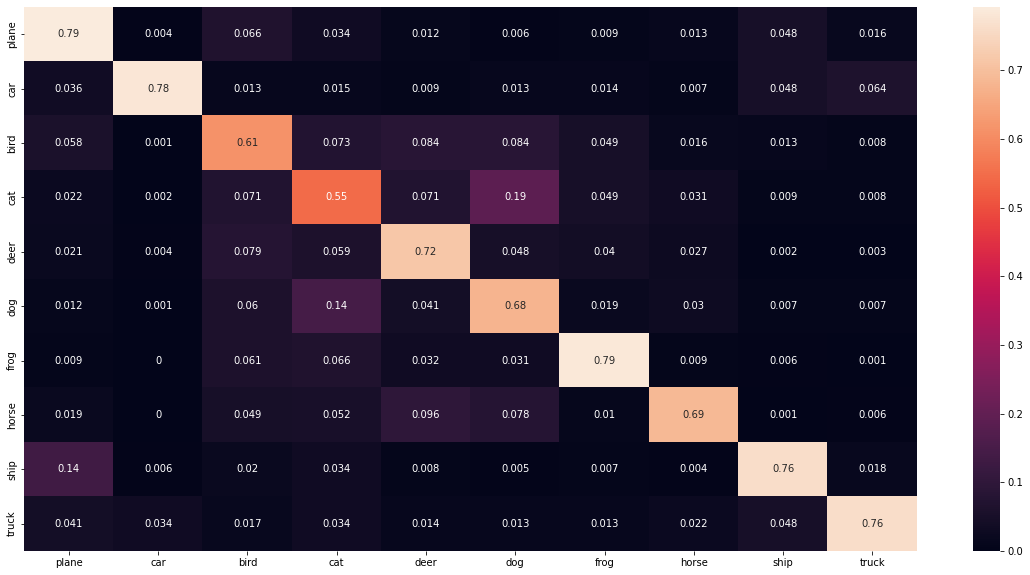

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

model.to('cpu')

# iterate over test data
for inputs, labels in testloader:
#         #reshape images so they can be fed to a nn.Linear()
#         inputs = inputs.view(inputs.size(0), -1)
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('plane', 'car', 'bird', 'cat',
       'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)
# plt.savefig('output.png')

What does each layer of the network do?

https://poloclub.github.io/cnn-explainer/